SPAM SMS DETECTION

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load SMS data

In [14]:
df = pd.read_csv('C:\\Users\\loges\\Downloads\\archive (3)\\spam.csv',encoding = 'latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1, inplace=True)
df.rename(columns={"v1":"ham_spam", "v2": "text"}, inplace=True)
df

,ham_spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
X = df['text']
y = df['ham_spam']


In [18]:

# Convert labels to binary (0 for legitimate, 1 for spam)
y = y.map({'ham': 0, 'spam': 1})

In [19]:
#split the data into training and tetsing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.9739910313901345
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))



Logistic Regression Accuracy: 0.968609865470852
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [23]:
# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSupport Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))


Support Vector Machine Accuracy: 0.979372197309417
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



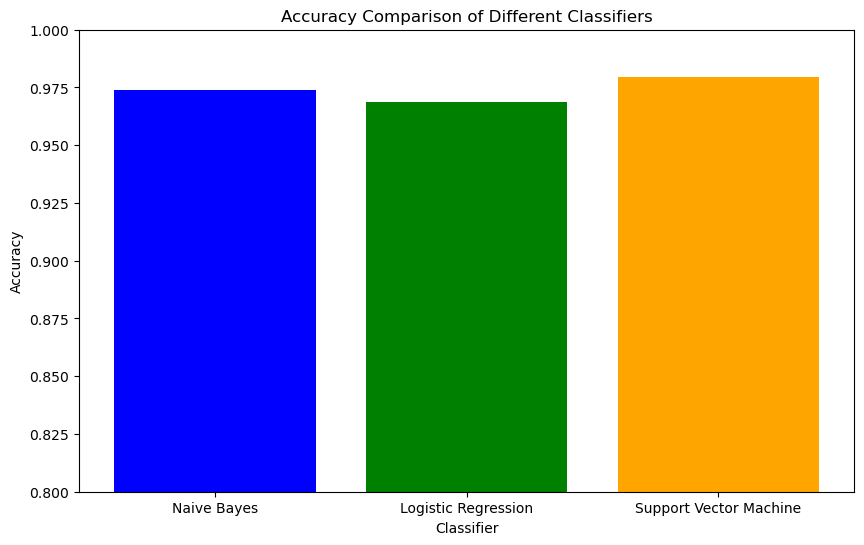

In [24]:
import matplotlib.pyplot as plt

# Accuracy of Naive Bayes Classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Accuracy of Logistic Regression Classifier
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Accuracy of Support Vector Machine Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Create a bar plot
classifiers = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine']
accuracies = [nb_accuracy, lr_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()

Accuracy - Naive Bayes: 0.9739910313901345
Accuracy - Logistic Regression: 0.968609865470852
Accuracy - Support Vector Machine: 0.979372197309417


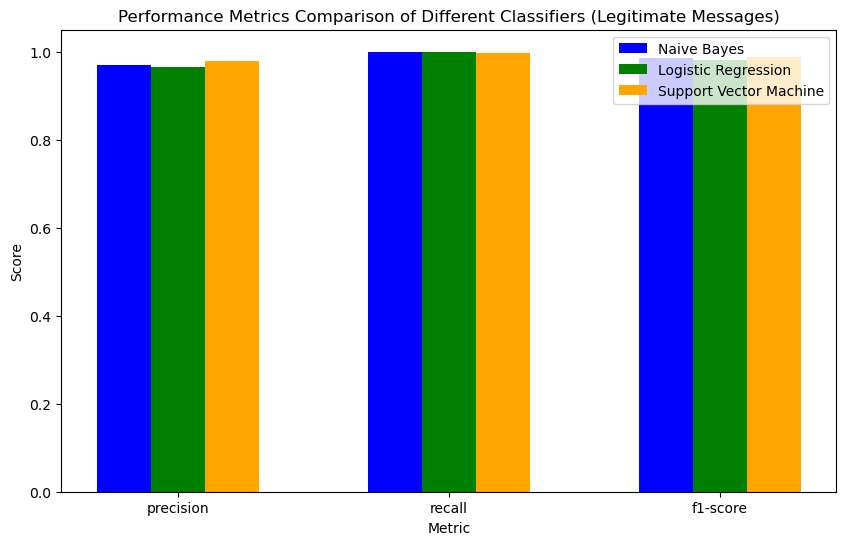

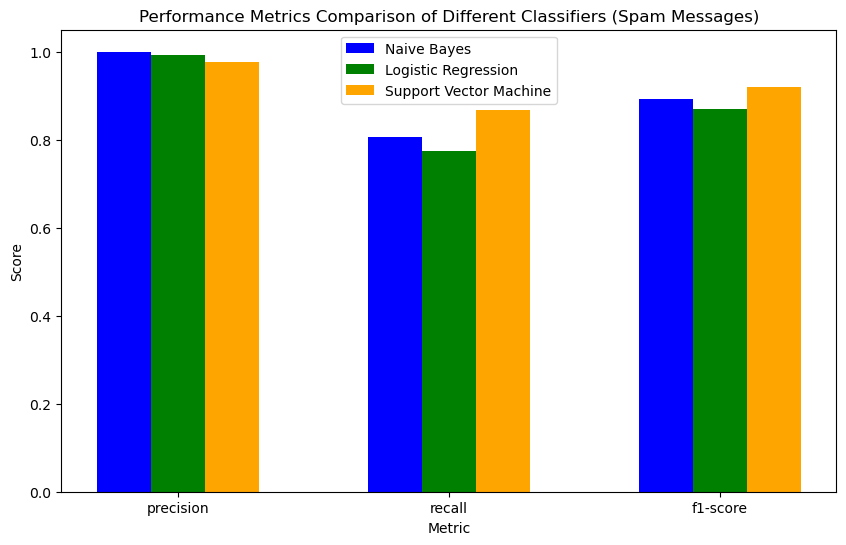

In [28]:
import numpy as np

# Define the metrics
metrics = ['precision', 'recall', 'f1-score']

# Define the index array for bar positions
index = np.arange(len(metrics))

# Extract metrics for each class and each classifier
nb_scores_legit = [nb_report['0'][metric] for metric in metrics]
nb_scores_spam = [nb_report['1'][metric] for metric in metrics]

lr_scores_legit = [lr_report['0'][metric] for metric in metrics]
lr_scores_spam = [lr_report['1'][metric] for metric in metrics]

svm_scores_legit = [svm_report['0'][metric] for metric in metrics]
svm_scores_spam = [svm_report['1'][metric] for metric in metrics]

# Print accuracy
print("Accuracy - Naive Bayes:", nb_accuracy)
print("Accuracy - Logistic Regression:", lr_accuracy)
print("Accuracy - Support Vector Machine:", svm_accuracy)

# Create grouped bar plot for legitimate messages
plt.figure(figsize=(10, 6))

plt.bar(index - 0.2, nb_scores_legit, 0.2, label='Naive Bayes', color='blue')
plt.bar(index, lr_scores_legit, 0.2, label='Logistic Regression', color='green')
plt.bar(index + 0.2, svm_scores_legit, 0.2, label='Support Vector Machine', color='orange')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison of Different Classifiers (Legitimate Messages)')
plt.xticks(index, metrics)
plt.legend()
plt.show()

# Create grouped bar plot for spam messages
plt.figure(figsize=(10, 6))

plt.bar(index - 0.2, nb_scores_spam, 0.2, label='Naive Bayes', color='blue')
plt.bar(index, lr_scores_spam, 0.2, label='Logistic Regression', color='green')
plt.bar(index + 0.2, svm_scores_spam, 0.2, label='Support Vector Machine', color='orange')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison of Different Classifiers (Spam Messages)')
plt.xticks(index, metrics)
plt.legend()
plt.show()



                       ----------------------------------------------------------------------------------------